In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Decision_Tree_Code import DecisionTreeCLS, DecisionTreeREG
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier 

In [76]:
data = pd.read_csv("iris_data.csv")
data

,feature1,feature2,target
0,5.1,3.5,0.0
1,4.9,3.0,0.0
2,4.7,3.2,0.0
3,4.6,3.1,0.0
4,5.0,3.6,0.0
...,...,...,...
145,6.7,3.0,1.0
146,6.3,2.5,1.0
147,6.5,3.0,1.0
148,6.2,3.4,1.0


In [77]:
X = data.drop("target", axis = 1).values
y = data["target"].values.astype("int32")

In [78]:
model = DecisionTreeCLS(max_depth=3,criterion="gini")
model.fit(X,y)

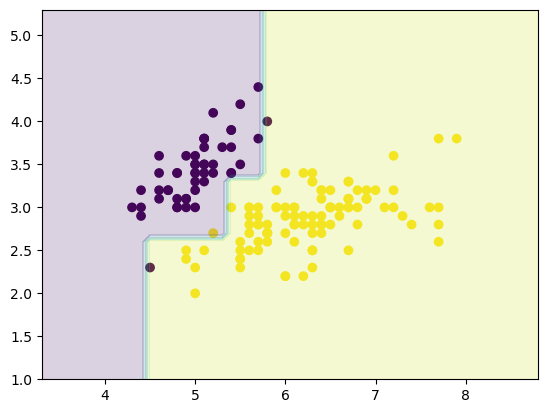

In [79]:
plt.scatter(X[:,0],X[:,1],c = y)
x1_min, x1_max = X[:,0].min()-1 , X[:,0].max()+1
x2_min, x2_max = X[:,1].min()-1 , X[:,1].max()+1
xx1, xx2 = np.meshgrid(
    np.arange(x1_min,x1_max,.1),
    np.arange(x2_min,x2_max,.1)
)
meshgred_points = np.array([xx1.ravel(),xx2.ravel()]).T
z = model.predict(meshgred_points)
z = z.reshape(xx1.shape)
plt.contourf(xx1, xx2, z,alpha = .2)

In [80]:
model = DecisionTreeClassifier(max_depth = 3)
model.fit(X,y)

DecisionTreeClassifier(max_depth=3)

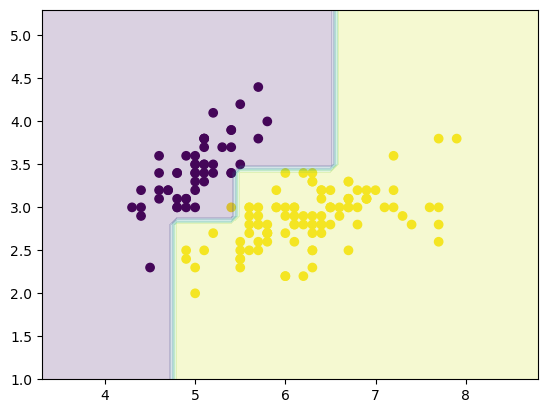

In [81]:
plt.scatter(X[:,0],X[:,1],c = y)
x1_min, x1_max = X[:,0].min()-1 , X[:,0].max()+1
x2_min, x2_max = X[:,1].min()-1 , X[:,1].max()+1
xx1, xx2 = np.meshgrid(
    np.arange(x1_min,x1_max,.1),
    np.arange(x2_min,x2_max,.1)
)
meshgred_points = np.array([xx1.ravel(),xx2.ravel()]).T
z = model.predict(meshgred_points)
z = z.reshape(xx1.shape)
plt.contourf(xx1, xx2, z,alpha = .2)

In [82]:
data = pd.read_csv("muliclass.csv")
data

,0,1,target
0,-8.028029,-9.004721,2.0
1,-9.030661,-7.841498,2.0
2,-0.452835,5.962177,0.0
3,4.095676,4.720112,1.0
4,-11.974939,-9.400325,2.0
...,...,...,...
295,-5.386682,9.953531,0.0
296,2.567391,0.572717,1.0
297,-6.527906,9.475871,0.0
298,-6.833581,-2.689016,2.0


In [83]:
x = data.drop("target", axis=1).values
y = data['target'].values.astype("int32")
print(x.shape)
print(y.size)
x[:,0].size

(300, 2)
300


300

In [84]:
model = DecisionTreeCLS(max_depth=5)
model.fit(x, y)

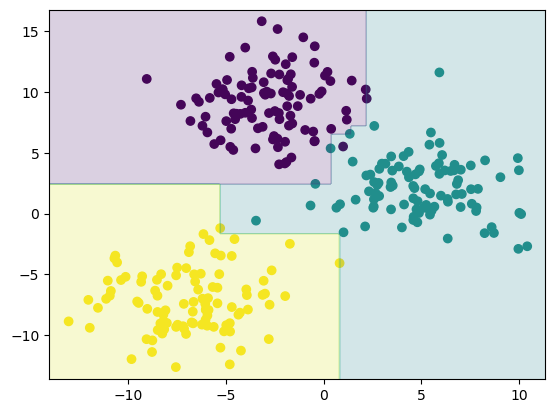

In [85]:
plt.scatter(x[:,0],x[:,1],c = y)
x1_min, x1_max = x[:,0].min()-1 , x[:,0].max()+1
x2_min, x2_max = x[:,1].min()-1 , x[:,1].max()+1
xx1, xx2 = np.meshgrid(
    np.arange(x1_min,x1_max,.1),
    np.arange(x2_min,x2_max,.1)
)
meshgred_points = np.array([xx1.ravel(),xx2.ravel()]).T
z = model.predict(meshgred_points)
z = z.reshape(xx1.shape)
plt.contourf(xx1, xx2, z,alpha = .2)

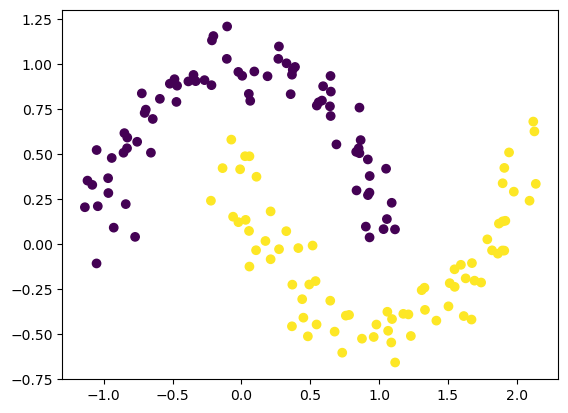

In [86]:
x, y = make_moons(n_samples=150, noise=.1, random_state=42)
plt.scatter(x[:,0],x[:,1],c = y)

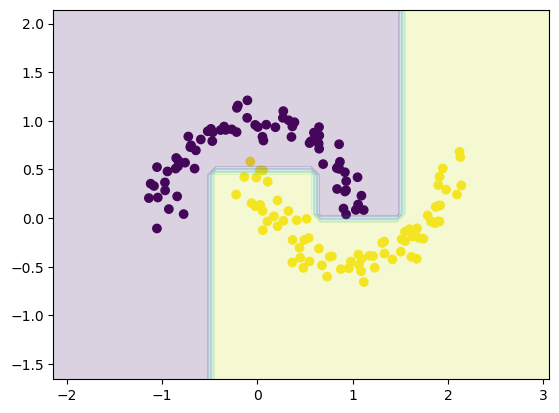

In [87]:
model = DecisionTreeClassifier(max_depth=5)
model.fit(x, y)
plt.scatter(x[:,0],x[:,1],c = y)
x1_min, x1_max = x[:,0].min()-1 , x[:,0].max()+1
x2_min, x2_max = x[:,1].min()-1 , x[:,1].max()+1
xx1, xx2 = np.meshgrid(
    np.arange(x1_min,x1_max,.1),
    np.arange(x2_min,x2_max,.1)
)
meshgred_points = np.array([xx1.ravel(),xx2.ravel()]).T
z = model.predict(meshgred_points)
z = z.reshape(xx1.shape)
plt.contourf(xx1, xx2, z,alpha = .2)

In [90]:
cv = cross_val_score(model, x, y)
print(cv)
print(cv.mean())

[0.83333333 0.8        0.96666667 0.83333333 0.96666667]
0.8800000000000001


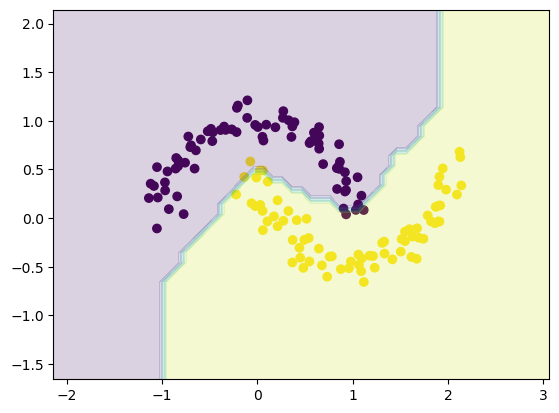

In [96]:
bag_cla = BaggingClassifier(ExtraTreeClassifier(max_depth=5, random_state=42), n_estimators=500, bootstrap=True, max_samples=100, random_state=42)
bag_cla.fit(x, y)
plt.scatter(x[:,0],x[:,1],c = y)
x1_min, x1_max = x[:,0].min()-1 , x[:,0].max()+1
x2_min, x2_max = x[:,1].min()-1 , x[:,1].max()+1
xx1, xx2 = np.meshgrid(
    np.arange(x1_min,x1_max,.1),
    np.arange(x2_min,x2_max,.1)
)
meshgred_points = np.array([xx1.ravel(),xx2.ravel()]).T
z = bag_cla.predict(meshgred_points)
z = z.reshape(xx1.shape)
plt.contourf(xx1, xx2, z,alpha = .2)

In [92]:
cv = cross_val_score(bag_cla, x, y)
print(cv)
print(cv.mean())

[0.86666667 1.         0.96666667 0.96666667 0.96666667]
0.9533333333333334


In [98]:
model = RandomForestClassifier(max_depth=5, bootstrap=True, criterion="entropy", random_state=42, oob_score=True)
model.fit(x, y)
model.oob_score_

0.9666666666666667